In [ ]:
# YOLO License Plate Detection and Cropping

This notebook uses the fine-tuned YOLO model to detect license plates in images and crop them automatically.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r /content/drive/MyDrive/ccpd_green/test /content

In [5]:
!cp -r "/content/drive/MyDrive/ccpd_green/train/03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg" /content

In [7]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.61 MiB | 23.36 MiB/s, done.
Resolving deltas: 100% (11994/11994), done.


In [8]:
!pip install -r /content/yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [19]:
!python yolov5/detect.py --weights yolo_finetuned_model.pt --source "03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg" --data inference_data.yaml --save-txt

detect: weights=['yolo_finetuned_model.pt'], source=03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg, data=inference_data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg: 640x416 1 license_plate, 317.5ms
Speed: 7.6ms pre-process, 317.5ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/run

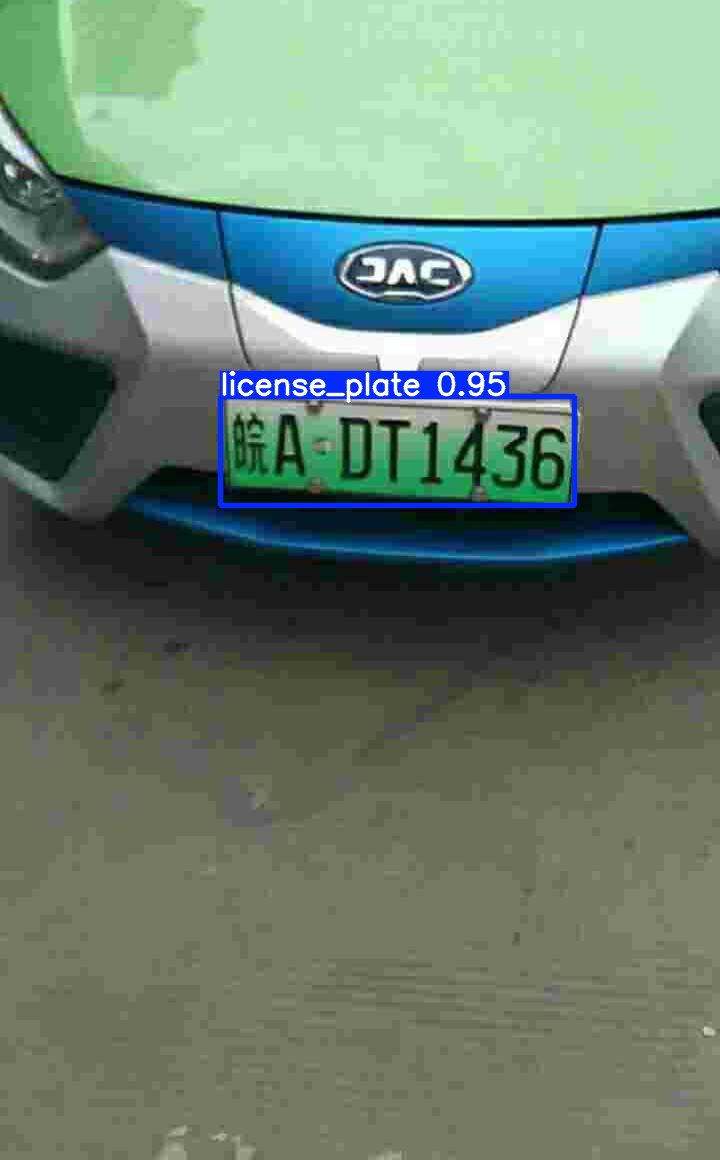

In [20]:
Image.open("/content/yolov5/runs/detect/exp5/03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg")

In [23]:
import cv2

# 1. Load your image
image_path = "/content/yolov5/runs/detect/exp5/03625-92_266-225&396_573&501-568&501_227&490_225&396_573&414-0_0_3_17_25_28_27_30-102-83.jpg"  # <-- replace this
image = cv2.imread(image_path)
h, w, _ = image.shape

# 2. Your YOLO bounding box (normalized)
x_center = 0.551389
y_center = 0.388362
box_width = 0.491667
box_height = 0.0939655

# 3. Convert to pixel values
x_center_px = x_center * w
y_center_px = y_center * h
box_width_px = box_width * w
box_height_px = box_height * h

# 4. Calculate top-left and bottom-right corners
x1 = int(x_center_px - box_width_px / 2)
y1 = int(y_center_px - box_height_px / 2)
x2 = int(x_center_px + box_width_px / 2)
y2 = int(y_center_px + box_height_px / 2)

# 5. Crop the image
cropped = image[y1:y2, x1:x2]

# 6. Save or display
cv2.imwrite("cropped_image.jpg", cropped)
# or use cv2.imshow("Crop", cropped) if running locally


True

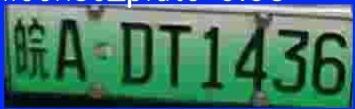

In [28]:
Image.open("/content/cropped_image.jpg")

In [29]:
cropped = cv2.imread("/content/cropped_image.jpg")
cropped.shape

(109, 355, 3)